In [7]:
using Plots
using DelimitedFiles
using ColorSchemes
#using CSV
using LaTeXStrings
#using PyPlot

In [8]:
file = raw"10_average_KL_divergence_1786_1849.txt"
M = readdlm(file)
index = M[:,1]; # index
KLd = M[:,2]; # Kld
KLd_SEOM = M[:,3]; # Kld_std

In [9]:
maximum(KLd)

2.074292809466561

In [10]:
minimum(KLd)

0.9645313753015416

In [11]:
maximum(KLd_SEOM)

0.10159850480231182

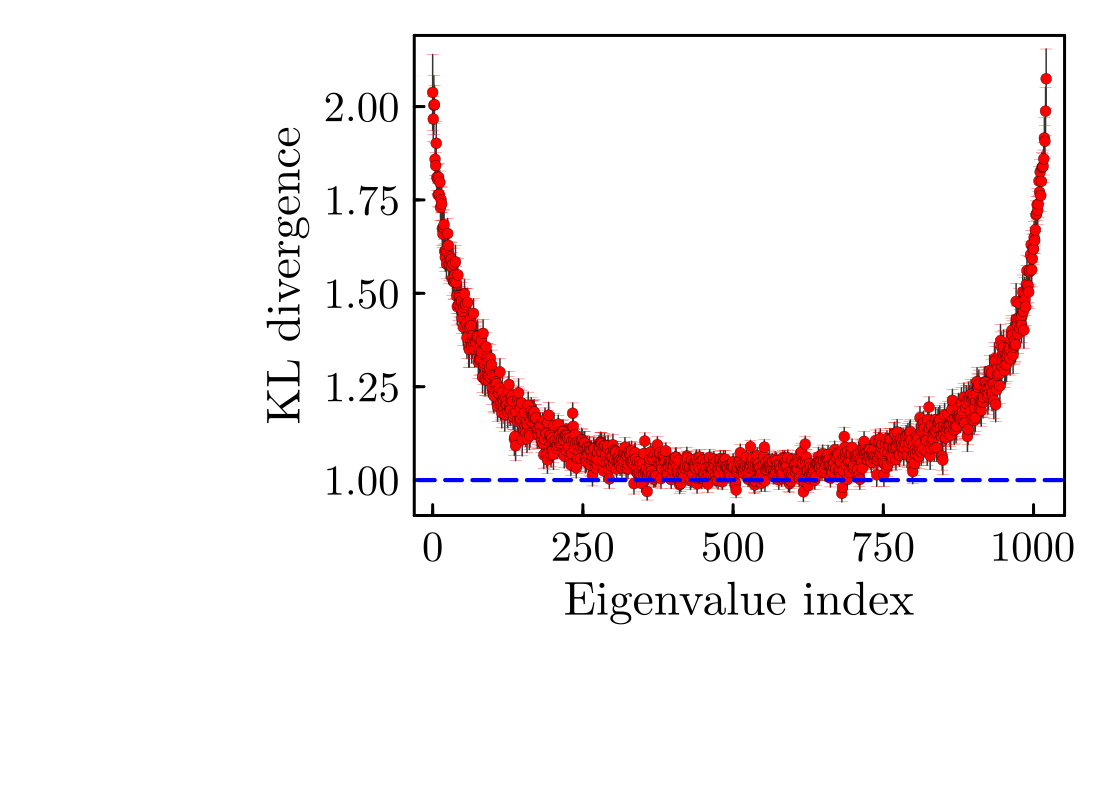

In [13]:
L = 10
MSW = 0.4
Linewidth  = 0.5
Markersize = 2
MarkerStrokeWidth = 0.07;

plot_font = "Computer Modern"
default(fontfamily=plot_font)

p = plot(index,KLd ,
    yerr = KLd_SEOM,
    linewidth = Linewidth,
    linecolor = "grey20",
    seriestype = :scatter,
    markercolor = "red",
    markerstrokecolor = "grey0",
    markerstrokewidth=MarkerStrokeWidth,
    markersize=Markersize,
    thickness_scaling = 3,
    markershape = :circle,
    #xlims=(-80,2^L+80), 
    #ylims=(0.8,1.5),
    title = "",
    label = "",#L"H_{\textbf{eff}}",
    legend = :bottomright,
    dpi=300,
    #zcolor = entropy,
    grid = false,
    #colorbar_title = "Average entanglement entropy",
    font="CMU Serif",
    #color = :jet1,
    #:linear_bmy_10_95_c78_n256,#:diverging_rainbow_bgymr_45_85_c67_n256,#:linear_bmy_10_95_c78_n256,#:rainbow1,
    right_margin = Plots.mm,
    left_margin = Plots.mm,
    titlefontsize=10,
    guidefontsize=10,
    tickfontsize=9,
    legendfontsize=8,
    framestyle = :box
    )

#xticks!([0,5000,10000,16000], [L"0",L"5000",L"10000",L"16000"])
#=
Adjust the length of the axis tick.
=#

function ticks_length!(;tl=0.02)
    p = Plots.current()
    xticks, yticks = Plots.xticks(p)[1][1], Plots.yticks(p)[1][1]
    xl, yl = Plots.xlims(p), Plots.ylims(p)
    x1, y1 = zero(yticks) .+ xl[1], zero(xticks) .+ yl[1]
    sz = p.attr[:size]
    r = sz[1]/sz[2]
    dx, dy = tl*(xl[2] - xl[1]), tl*r*(yl[2] - yl[1])
    plot!([xticks xticks]', [y1 y1 .+ dy]', c=:black, labels=false,linewidth = 1)
    plot!([x1 x1 .+ dx]', [yticks yticks]', c=:black, labels=false,linewidth = 1, xlims=xl, ylims=yl)
    return Plots.current()
end
#xticks!([0,5000,10000,15000], [L"0",L"5",L"10",L"15"])
ticks_length!(tl=0.015)
plot!(size=(1100,800))
hline!([[1]],lc=:blue,linestyle= :dash, linewidth = 1.4,label = "",legend=:bottomright)
#hline!([[0.5307]],lc=:green,linestyle= :dashdot, linewidth = 2.5,label = "GOE",legend=:bottomright)
#hline!([[0.38629]],lc=:blueviolet,linestyle= :dashdotdot, linewidth = 2.5,label = "Poisson",legend=:bottomright)
#hline!([ [3.11034138188]],lc=:magenta,linestyle= :dashdotdot,legend=false)
xlabel!("Eigenvalue index")
ylabel!("KL divergence")

In [14]:
using Statistics
mean(KLd)

1.1605572632261647